## Rover Project Test Notebook
This notebook contains the functions from the lesson and provides the scaffolding you need to test out your mapping methods.  The steps you need to complete in this notebook for the project are the following:

* First just run each of the cells in the notebook, examine the code and the results of each.
* Run the simulator in "Training Mode" and record some data. Note: the simulator may crash if you try to record a large (longer than a few minutes) dataset, but you don't need a ton of data, just some example images to work with.   
* Change the data directory path (2 cells below) to be the directory where you saved data
* Test out the functions provided on your data
* Write new functions (or modify existing ones) to report and map out detections of obstacles and rock samples (yellow rocks)
* Populate the `process_image()` function with the appropriate steps/functions to go from a raw image to a worldmap.
* Run the cell that calls `process_image()` using `moviepy` functions to create video output
* Once you have mapping working, move on to modifying `perception.py` and `decision.py` to allow your rover to navigate and map in autonomous mode!

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

**Run the next cell to get code highlighting in the markdown cells.**

In [1]:
%%HTML
<style> code {background-color : orange !important;} </style>

In [2]:
%matplotlib inline
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window (note it may show up behind your browser)
# Make some of the relevant imports
import cv2 # OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder
import imageio
#imageio.plugins.ffmpeg.download()


## Quick Look at the Data
There's some example data provided in the `test_dataset` folder.  This basic dataset is enough to get you up and running but if you want to hone your methods more carefully you should record some data of your own to sample various scenarios in the simulator.  

Next, read in and display a random image from the `test_dataset` folder

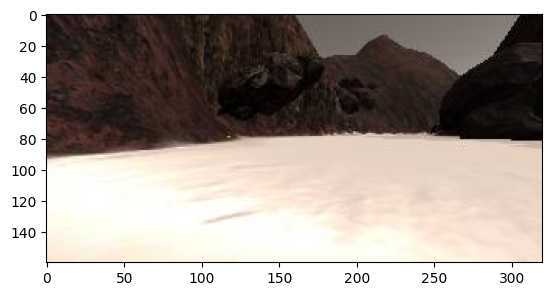

In [3]:
path = '../test_dataset/IMG/*'
img_list = glob.glob(path) # is a list of all the images file name in the folder 
# Grab a random image and display it
idx=np.random.randint(0,len(img_list)-1) # Choose a random index to obtain a random pic from the folder
image=mpimg.imread(img_list[idx]) # read the random image
plt.imshow(image) 

## Calibration Data
Read in and display example grid and rock sample calibration images.  You'll use the grid for perspective transform and the rock image for creating a new color selection that identifies these samples of interest. 

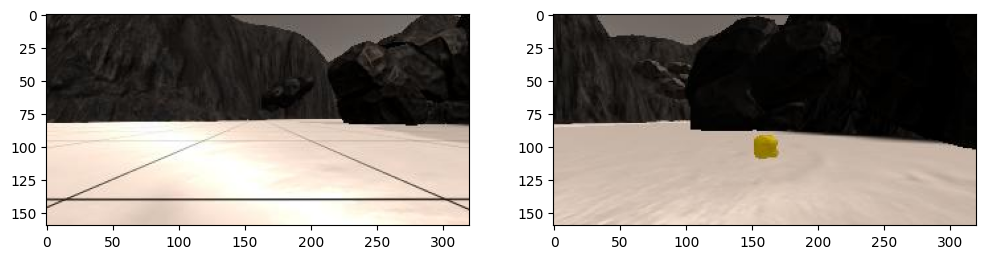

In [4]:
# In the simulator you can toggle on a grid on the ground for calibration
# You can also toggle on the rock samples with the 0 (zero) key.  
# Here's an example of the grid and one of the rocks
# example_grid="../calibration_images/example_grid1.jpg"
example_grid="../calibration_images/example_grid1.jpg"#grids are of size 1x1 meter square
example_rock="../calibration_images/example_rock1.jpg"
grid_img=mpimg.imread(example_grid)
rock_img=mpimg.imread(example_rock)

fig= plt.figure(figsize=(12,3))   #subplot 121 means in 1 row and 2 columns subplot choose image 1
plt.subplot(121)
plt.imshow(grid_img)
plt.subplot(122)
plt.imshow(rock_img)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread("../calibration_images/example_grid1.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray[0:100]=cv2.GaussianBlur(gray[0:100],(17,17),0)
# Find the corners in the image
corners = cv2.goodFeaturesToTrack(gray, maxCorners=4, qualityLevel=0.01, minDistance=10)

# Convert the corners to a NumPy array
corners = np.int0(corners)

# Loop through the corners and draw them on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

# Show the image

cv2.imshow('Corners', img)
cv2.waitKey()

# import cv2
# import numpy as np
# from sklearn.cluster import KMeans

# # Load the image
# img = cv2.imread('image.jpg')

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Find the corners in the image
# corners = cv2.goodFeaturesToTrack(gray, maxCorners=10, qualityLevel=0.01, minDistance=10)

# # Convert the corners to a NumPy array
# corners = np.int0(corners)

# # Use k-means to cluster the corners into 2 clusters
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(corners)

# # Calculate the average of each cluster
# cluster_centers = kmeans.cluster_centers_

# # Loop through the cluster centers and draw them on the image
# for center in cluster_centers:
#     x, y = center.ravel()
#     cv2.circle(img, (x, y), 3, 255, -1)

# # Show the image
# cv2.imshow('Clusters', img)
# cv2.waitKey()



QObject::moveToThread: Current thread (0x1588c50) is not the object's thread (0x25591e0).
Cannot move to target thread (0x1588c50)

QObject::moveToThread: Current thread (0x1588c50) is not the object's thread (0x25591e0).
Cannot move to target thread (0x1588c50)

QObject::moveToThread: Current thread (0x1588c50) is not the object's thread (0x25591e0).
Cannot move to target thread (0x1588c50)

QObject::moveToThread: Current thread (0x1588c50) is not the object's thread (0x25591e0).
Cannot move to target thread (0x1588c50)

QObject::moveToThread: Current thread (0x1588c50) is not the object's thread (0x25591e0).
Cannot move to target thread (0x1588c50)

QObject::moveToThread: Current thread (0x1588c50) is not the object's thread (0x25591e0).
Cannot move to target thread (0x1588c50)

QObject::moveToThread: Current thread (0x1588c50) is not the object's thread (0x25591e0).
Cannot move to target thread (0x1588c50)

QObject::moveToThread: Current thread (0x1588c50) is not the object's thread

233

In [16]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("../calibration_images/example_grid1.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray[0:100]=cv2.GaussianBlur(gray[0:100],(27,27),0)

# Use the Shi-Tomasi corner detection algorithm to find corners in the image
corners = cv2.goodFeaturesToTrack(gray, maxCorners=10, qualityLevel=0.01, minDistance=5)

# Convert the corners from a NumPy array to a list
corners = corners.tolist()

# Loop through the list of corners and draw a circle at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(img, (int(x), int(y)), 3, (255, 0, 0), -1)

# Display the image
cv2.imshow('Corners', img)
cv2.waitKey(0)

233

In [21]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("../calibration_images/example_grid1.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use the Harris corner detection algorithm to find corners in the image
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Threshold the corner response matrix
threshold = 0.1 * dst.max()
ret, dst = cv2.threshold(dst, threshold, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and cluster the points within each contour
average_corners = []
for contour in contours:
    # Reshape the contour into a set of points
    points = contour.reshape(-1, 2)

    # Use mean shift clustering to find the average point in the contour
    _, average_point, _ = cv2.meanShift(points, 10)

    # Add the average point to the list of average corners
    average_corners.append(average_point)

# Loop through the list of average corners and draw a circle at each corner
for average_corner in average_corners:
    x, y = average_corner
    cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

# Display the image
cv2.imshow('Average Corners', img)
cv2.waitKey(0)

(160, 320)


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'meanShift'
> Overload resolution failed:
>  - meanShift() missing required argument 'criteria' (pos 3)
>  - meanShift() missing required argument 'criteria' (pos 3)


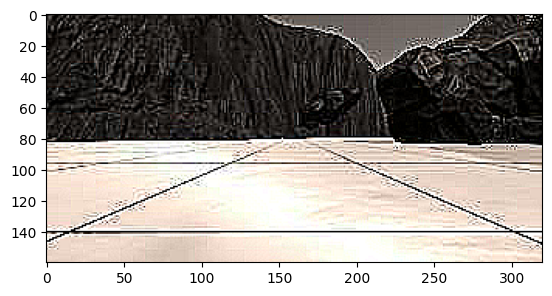

In [5]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
dst2 = cv2.filter2D(grid_img, -1, kernel_sharpening)
plt.imshow(dst2)


In [83]:
def get_corners(image):
#     kernel_sharpening = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#     dst2 = cv2.filter2D(image, -1, kernel_sharpening)
#     dst = cv2.fastNlMeansDenoisingColored(dst2,None,20,10,7,21)
    # plt.imshow(dst)
    from sklearn.cluster import KMeans
    import pandas as pd
    kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
    dst2 = cv2.filter2D(image, -1, kernel_sharpening)


    img=dst.copy() 
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) 
    equ = cv2.equalizeHist(gray)
    equ[0:100]=cv2.GaussianBlur(equ[0:100],(13,13),0)
    # stacking images side-by-side
    gray = np.float32(equ)
    #img=grid_img.copy() 
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    #gray = np.float32(gray)
    dst1 = cv2.cornerHarris(gray,4,5,0.06)  # 2, 3, 0.04
    #result is dilated for marking the corners, not important
    # dst1 = cv2.dilate(dst1,None)
    #plt.imshow(dst1)

    # Threshold for an optimal value, it may vary depending on the image.
    test=np.array((img.shape[0],img.shape[1],3))
    test=img.copy()
    img[dst1>0.06*dst1.max()]=[0,0,255]



    # Define the blue colour we want to find - remember OpenCV uses BGR ordering
    blue = [0,0,255]

    # Get X and Y coordinates of all blue pixels
    Y, X = np.where(np.all(img==blue,axis=2))


    corners=[]
    corners_x=[]
    corners_y=[]
    for i in range(len(X)):
        x,y = X[i],Y[i],
        corners.append((x,y))
        corners_x.append(x)
        corners_y.append(y)
        
        
    # Define a set of points
    points = np.array(corners)

    # Use k-means clustering to cluster the points
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(points)

    # Print the cluster labels for each point
    labels=kmeans.labels_

    corn_labs=np.array ([corners_x,corners_y,labels]).T
    df=pd.DataFrame(corn_labs,columns=["Corners_x","Corners_y","Label"])
    labels_groups=df.groupby("Label")
    average_corners=np.array(labels_groups.mean())

    for y,x in average_corners:
#         test[int(x),int(y),:]=[0,0,255]
        cv2.circle(test, (int(y),int(x)), 5, (0, 0, 255), -1)
    plt.imshow(test)
    return average_corners,test
    
    # for i in range(len(corners)):
    #     if labels[i]==0:
    #         img[corner[i][0],corner[i][1],:]=[0,0,255]
    #     elif labels[i]==1:
    #         img[corner[i][0],corner[i][1],:]=[0,255,0]
    #     elif labels[i]==2:
    #         img[corner[i][0],corner[i][1],:]=[255,0,0]
    #     else:
    #         img[corner[i][0],corner[i][1],:]=[255,0,255]

#     plt.imshow(test)


(array([[302.82608696, 140.7173913 ],
        [ 15.97826087, 140.41304348],
        [110.5       , 100.5       ],
        [209.        , 100.5       ]]),
 array([[[ 28,  23,  21],
         [ 22,  18,  16],
         [ 15,  12,  11],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [ 82,  79,  74]],
 
        [[ 36,  30,  27],
         [ 44,  38,  34],
         [ 54,  47,  43],
         ...,
         [ 52,  49,  46],
         [ 19,  18,  16],
         [  0,   0,   0]],
 
        [[ 38,  32,  29],
         [ 54,  47,  43],
         [ 72,  63,  58],
         ...,
         [  0,   0,   0],
         [  4,   4,   3],
         [  0,   0,   0]],
 
        ...,
 
        [[235, 212, 199],
         [235, 212, 199],
         [235, 212, 199],
         ...,
         [247, 225, 206],
         [247, 225, 206],
         [247, 225, 206]],
 
        [[235, 212, 199],
         [235, 212, 199],
         [235, 212, 199],
         ...,
         [247, 225, 206],
         [247, 225, 2

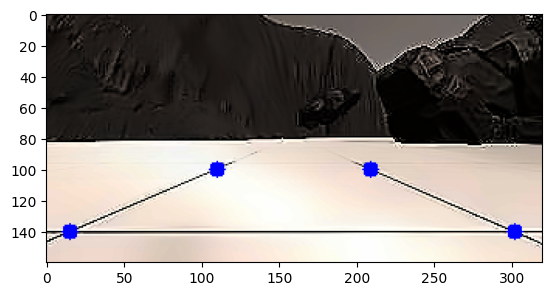

In [84]:
get_corners(grid_img)

In [22]:
def red(im):
    return im[:,:,0]
def green(im):
    return im[:,:,1]
def blue(im):
    return im[:,:,2]
def gray(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)


def find_lines(img,minLineLength=100,maxLineGap=40,rho = 1,canny_t=(1200,410),top=10):
    img2 = img.copy()
    gimg2 = gray(img)
    edges = cv2.Canny(gimg2,canny_t[0],canny_t[1],apertureSize =3)
    plt.imshow(edges)
    lines = cv2.HoughLinesP(edges,
                           rho = rho,
                           theta = np.pi/180,threshold = 1,
                           minLineLength = minLineLength,
                           maxLineGap = maxLineGap)
    # print (sum(sum(lines[0]-lines[3])))
    # print (sum(sum(lines[2]-lines[4])))
    # print(sum(sum(lines[0]))-sum(sum(lines[3])))
    #lines=list(lines)
#-----------------------Removing similar lines----------------------------
    lines.reshape(lines.shape[0],-1)
    sums=[sum(sum(line)) for line in lines]
#     print(sums)
    
    all_lines_sum=sums.copy()

    i=1
    for line1 in all_lines_sum:
        j=i
        for line2 in all_lines_sum[i:]:
            # print(type(line1))
            # print(np.sum(line1-line2))
            
            if abs(np.sum(line1-line2))<25:
                #np.delete(lines,line2)
                # print(line1)
                # print(line2)
                # print("---")
                ind=(sums.index(line2))
                sums.remove(line2)
                all_lines_sum.remove(line2)
                lines=np.delete(lines,ind,axis=0)
              
        
            j+=1
        i+=1
    # print(sums)
    print(lines)
#---------------------------------------------------
    try:
        for line in lines:
            mag = [np.sqrt(np.power(y2-y1,2)+np.power(x2-x1,2)) for x1,y1,x2,y2 in line]
            mag = zip(np.arange(len(mag)),mag)
            mag = sorted(mag, key=lambda tup: tup[1],reverse=True)
            line = line[0]
            #print(lines)
            #print(lines[1])
            
            
            
            for i in range(min(len(mag),top)):
                index = mag[i][0]
                x1,y1,x2,y2 = line
                cv2.line(img2,(x1,y1),(x2,y2),(0,255,0),2)
    except:
        raise
    plt.imshow(img2)
find_lines(dst2)


NameError: name 'dst2' is not defined

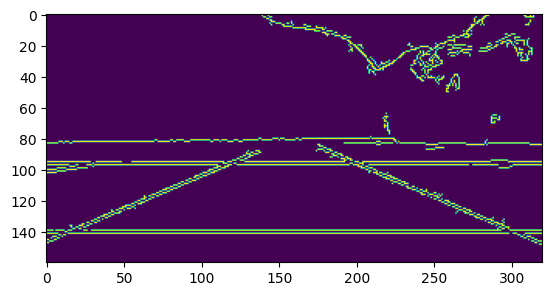

In [7]:
edges = cv2.Canny(gray(dst2),800,310)
plt.imshow(edges)
#800,70 was good for grid 1

In [296]:
[
    [],
    [],
    []
],
[
    [],
    [],
    []
],
[
    [],
    [],
    []
]

In [293]:
l=[(1,2),(1,3),(1,2)]
set(l)

{(1, 2), (1, 3)}

[[[139.          1.5707964]]

 [[ 77.          1.5707964]]

 [[ 75.          1.5882496]]

 [[ 71.          1.6057029]]]


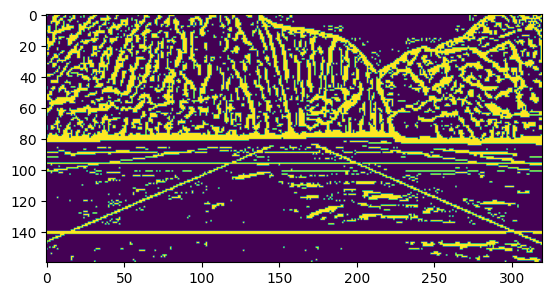

In [252]:
import cv2
import numpy as np
from math import radians 

# kernel_sharpening = np.array([[-1,-1,-1], 
#                               [-1, 8,-1],
#                               [-1,-1,-1]])
# sharp = cv2.filter2D(grid_img, -1, kernel_sharpening)

gray = cv2.cvtColor(grid_img, cv2.COLOR_BGR2GRAY)
# blur = cv2.medianBlur(gray, 5)

adapt_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
thresh_type = cv2.THRESH_BINARY_INV
bin_img = cv2.adaptiveThreshold(gray, 255, adapt_type, thresh_type, 11, 2)
plt.imshow(bin_img)


rho, theta, thresh = 2, np.pi/180, 400
lines = cv2.HoughLines(bin_img, rho, theta, thresh)
print(lines)

#_-------------------------------
# for line in lines:
#     m = -np.arctan(line[1])
#     c = line[0]*np.arcsin(line[1])
#     x = np.linspace(0, 160, 161)
#     y=lambda i: (m*)np.sin(3*i),
#     fig, ax = plt.subplots(7,1)
#     fig.set_size_inches(7,20)
#     fs = [
#         lambda i: 1,
#         lambda i: np.sin(3*i),
#         lambda i: 0.5*np.sin(10*i+np.pi),
#         lambda i: 0.3*np.sin(15*i),
#         lambda i: 0.2*np.sin(30*i+np.pi)
#     ]
#     ax[0].plot([0]*75+[1]*75+[0]*75)
#     ax[0].set_title("Target")
#     c = 1
#     for f in fs:
#         ax[c].plot([f(xi) for xi in x])
#         ax[c].set_title("f%d" % c)
#         c+= 1

#     ax[6].plot([sum([f(xi) for f in fs[:-1]]) for xi in x])
#     ax[6].set_title("f%d + f%d + f%d" % (0,1,2))
#     at = lambda f,t: np.sin(2*np.pi*f*t) 
#     bt = lambda f,t: 0.333*np.sin(2*np.pi*3*f*t)
#     gt = lambda f,t: at(f,t) + bt(f,t)


#     x = np.linspace(np.pi, 2*np.pi, 201)
#     fig, ax = plt.subplots(2,2)
#     fig.set_size_inches(8,7)
#     ax[0,0].plot([at(2,xi) for xi in x])
#     ax[0,1].plot([bt(2,xi) for xi in x])
#     ax[1,0].plot([gt(2,xi) for xi in x])
#     ax[1,1].bar([0,1,2],[1,0,0.3])
#     ax[1,1].set_title("One form of spuctrum")
#_-------------------------------
from collections import defaultdict
def segment_by_angle_kmeans(lines, k=2, **kwargs):
    """Groups lines based on angle with k-means.

    Uses k-means on the coordinates of the angle on the unit circle 
    to segment `k` angles inside `lines`.
    """

    # Define criteria = (type, max_iter, epsilon)
    default_criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER
    criteria = kwargs.get('criteria', (default_criteria_type, 10, 1.0))
    flags = kwargs.get('flags', cv2.KMEANS_RANDOM_CENTERS)
    attempts = kwargs.get('attempts', 10)

    # returns angles in [0, pi] in radians
    angles = np.array([line[0][1] for line in lines])
    # multiply the angles by two and find coordinates of that angle
    pts = np.array([[np.cos(2*angle), np.sin(2*angle)]
                    for angle in angles], dtype=np.float32)

    # run kmeans on the coords
    labels, centers = cv2.kmeans(pts, k, None, criteria, attempts, flags)[1:]
    labels = labels.reshape(-1)  # transpose to row vec

    # segment lines based on their kmeans label
    segmented = defaultdict(list)
    for i, line in enumerate(lines):
        segmented[labels[i]].append(line)
    segmented = list(segmented.values())
    return segmented

segmented = segment_by_angle_kmeans(lines)


def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [[x0, y0]]


def segmented_intersections(lines):
    """Finds the intersections between groups of lines."""

    intersections = []
    for i, group in enumerate(lines[:-1]):
        for next_group in lines[i+1:]:
            for line1 in group:
                for line2 in next_group:
                    intersections.append(intersection(line1, line2)) 

    return intersections


intersections = segmented_intersections(segmented)
intersections

for i in intersections:
    pass

-4.898587196589413e-15


/tmp/ipykernel_5779/866693962.py:5: RuntimeWarning: invalid value encountered in arcsin
  c = line[0][0]*np.arcsin(line[0][1])


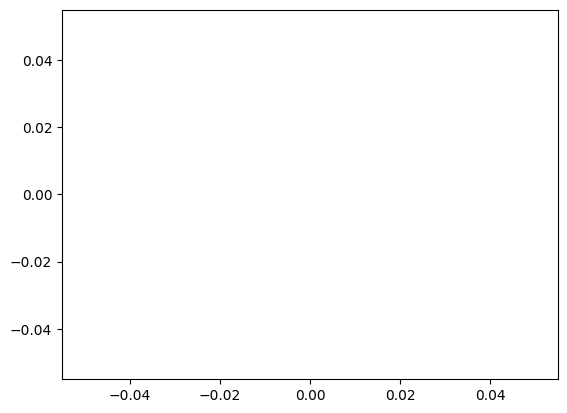

In [213]:
lines=[[[79.     ,    1.5707964]],[[81.    ,     1.553343 ]],[[75.    ,     1.5882496]],[[71.     ,    1.6057029]]]
import math
# for line in lines[:1]:
m = -np.arctan(line[0][1])
c = line[0][0]*np.arcsin(line[0][1])
x = np.linspace(1, 160, 160)
# print(m)
# print(line[0][1])
# print(math.degrees(np.arcsin(line[0][1])))
y  = lambda i: m*i+c
at = lambda f,t: np.sin(2*np.pi*f*t) 
#     bt = lambda f,t: 0.333*np.sin(2*np.pi*3*f*t)
#     gt = lambda f,t: at(f,t) + bt(f,t)


#     x = np.linspace(np.pi, 2*np.pi, 201)



# ax[0].plot([y(xi) for xi in x],x)
p=[y(int(xi)) for xi in x]
print(at(1,20))
plt.plot([y(xi) for xi in x],x)
    # ax[0,1].plot([bt(2,xi) for xi in x])
    # ax[1,0].plot([gt(2,xi) for xi in x])
    # ax[1,1].bar([0,1,2],[1,0,0.3])
    # ax[1,1].set_title("One form of spuctrum")
#     fig, ax = plt.subplots(7,1)
#     fig.set_size_inches(7,20)
#     fs = [
#         lambda i: 1,
#         lambda i: np.sin(3*i),
#         lambda i: 0.5*np.sin(10*i+np.pi),
#         lambda i: 0.3*np.sin(15*i),
#         lambda i: 0.2*np.sin(30*i+np.pi)
#     ]
#     ax[0].plot([0]*75+[1]*75+[0]*75)
#     ax[0].set_title("Target")
#     c = 1
#     for f in fs:
#         ax[c].plot([f(xi) for xi in x])
#         ax[c].set_title("f%d" % c)
#         c+= 1

#     ax[6].plot([sum([f(xi) for f in fs[:-1]]) for xi in x])
#     ax[6].set_title("f%d + f%d + f%d" % (0,1,2))


In [100]:
# # Python program to illustrate
# # corner detection with
# # Harris Corner Detection Method
 
# # organizing imports
# import cv2
# import numpy as np
 
# # path to input image specified and
# # image is loaded with imread command
# image = cv2.imread("../calibration_images/example_grid1.jpg" )
 
# # convert the input image into
# # grayscale color space
# operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# # modify the data type
# # setting to 32-bit floating point
# operatedImage = np.float32(operatedImage)
 
# # apply the cv2.cornerHarris method
# # to detect the corners with appropriate
# # values as input parameters
# dest = cv2.cornerHarris(operatedImage, 2, 9, 0.07)
 
# # Results are marked through the dilated corners
# dest = cv2.dilate(dest, None)
 
# # Reverting back to the original image,
# # with optimal threshold value
# image[dest > 0.01 * dest.max()]=[0, 0, 255]
 
# # the window showing output image with corners
# cv2.imshow('Image with Borders', image)
 
# # De-allocate any associated memory usage
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()


In [9]:

# #the below line of code defines the criteria for the algorithm to stop running,
# #which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
# #becomes 85%
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# # then perform k-means clustering wit h number of clusters defined as 3
# #also random centres are initially choosed for k-means clustering
# k = 2
# retval, labels, centers = cv2.kmeans(grid_img, k, None, criteria, 2, cv2.KMEANS_RANDOM_CENTERS)
 
# # convert data into 8-bit values
# centers = np.uint8(centers)
# segmented_data = centers[labels.flatten()]
 
# # reshape data into the original image dimensions
# segmented_image = segmented_data.reshape((image.shape))
 
# plt.imshow(segmented_image)

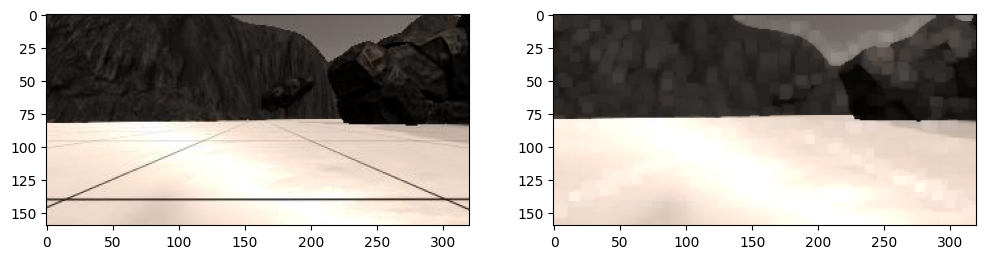

In [10]:
kernel=np.ones((7,7))
erosion = cv2.erode(grid_img,kernel,iterations = 1)
opening = cv2.morphologyEx(grid_img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(grid_img, cv2.MORPH_CLOSE, kernel)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
dilation = cv2.dilate(grid_img,kernel,iterations = 1)
fig= plt.figure(figsize=(12,3))   #subplot 121 means in 1 row and 2 columns subplot choose image 1
plt.subplot(121)
plt.imshow(grid_img)
plt.subplot(122)
plt.imshow(dilation)

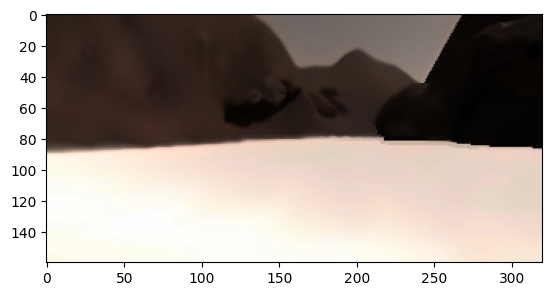

In [88]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
dst2 = cv2.filter2D(grid_img, -1, kernel_sharpening)
plt.imshow(dst2)
noiseless_image_bw = cv2.fastNlMeansDenoising(dst2, None, 20, 7, 21) 

noiseless_image_colored = cv2.fastNlMeansDenoisingColored(image,None,20,20,7,21)
plt.imshow(noiseless_image_colored)
# imagem = cv2.bitwise_not(dst2)
# plt.imshow(imagem)
#---
kernel=np.ones((3,3))
# LaplacePic = cv2.Laplacian(grid_img, 24, (5,5))
# plt.imshow(LaplacePic)
# dilation = cv2.dilate(LaplacePic,kernel,iterations = 1)
# plt.imshow(dilation)
# filteredImg = cv2.medianBlur(imagem, ksize=3)
# plt.imshow(filteredImg)
#innverse dst2

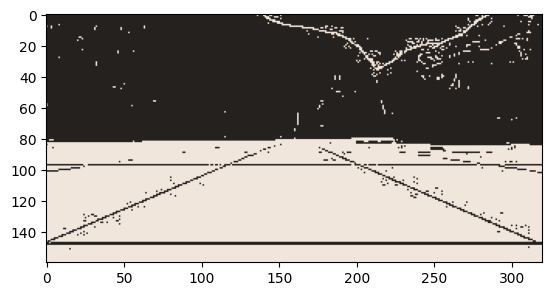

In [55]:
""" Image Segmentation """ 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt
import cv2

vectorized = dst2.reshape((-1,3))

kmeans = KMeans(n_clusters=2, random_state = 0, n_init=5).fit(vectorized)
centers = np.uint8(kmeans.cluster_centers_)
segmented_data = centers[kmeans.labels_.flatten()]
 
segmented_image = segmented_data.reshape((dst2.shape))
plt.imshow(segmented_image)
plt.pause(1)

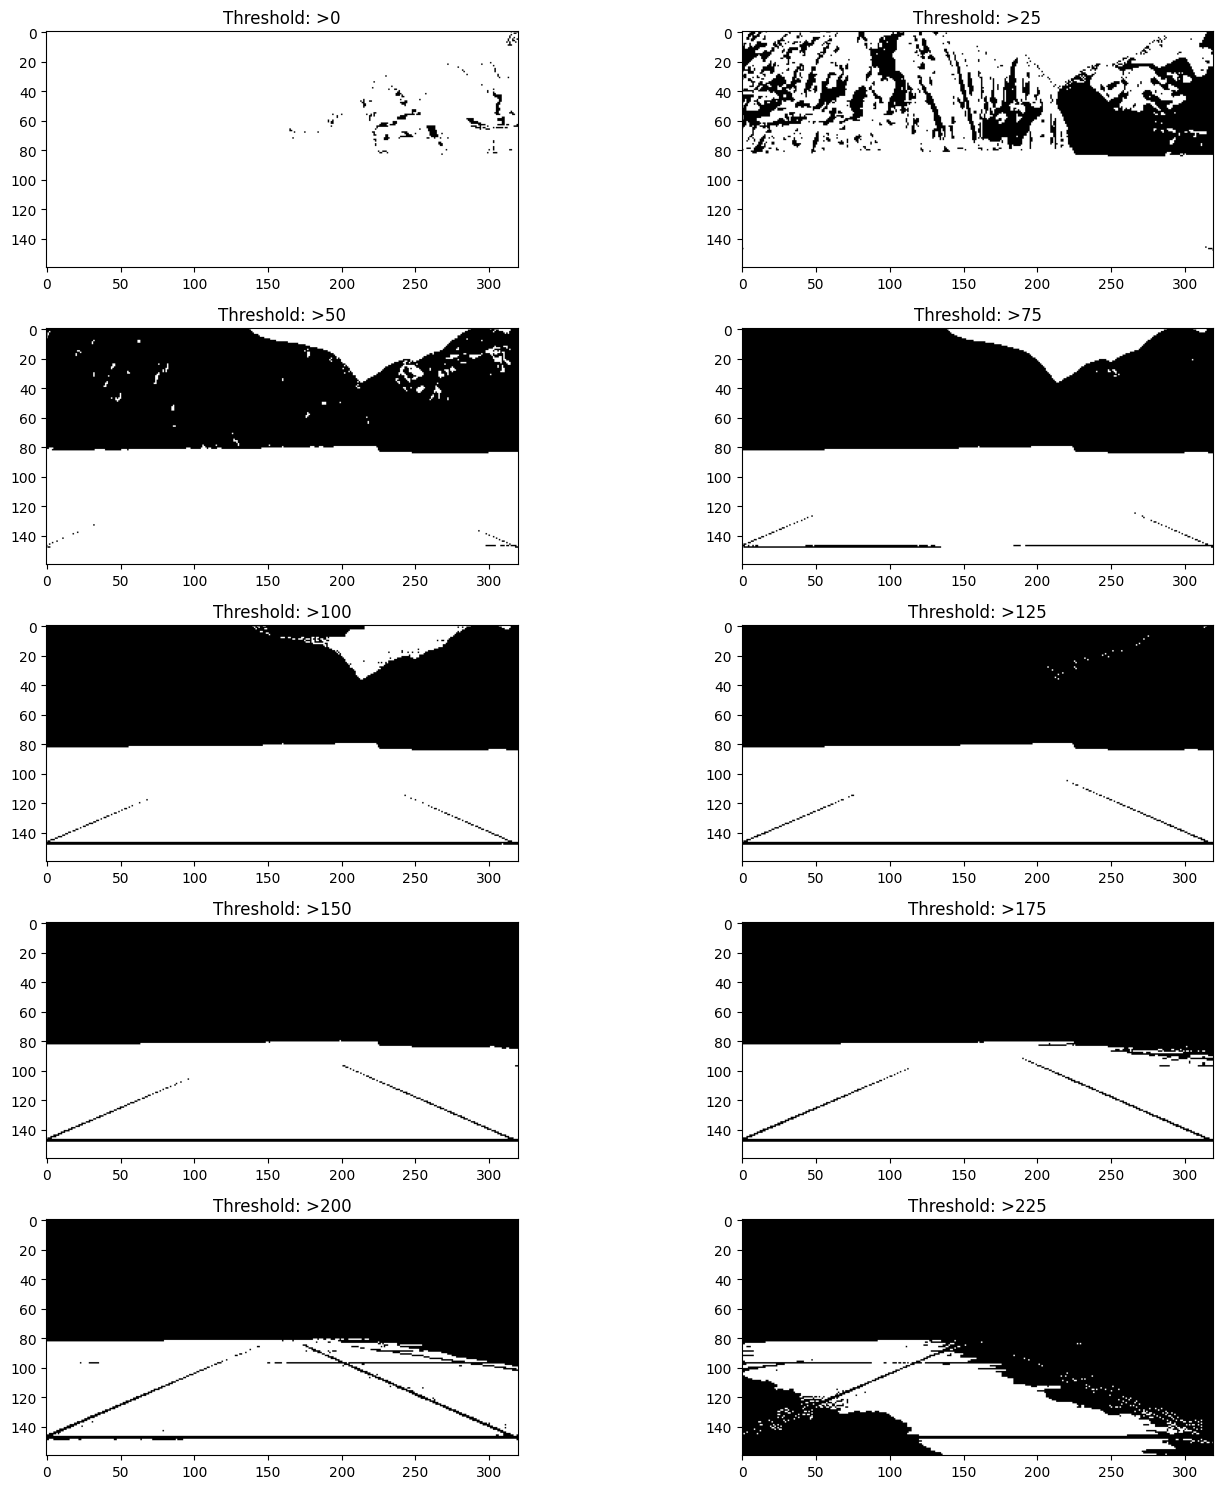

In [23]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format

import matplotlib.pyplot as plt
 
# Sample Image of scikit-image package

gray_coffee = gray(grid_img)
 
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
for i in range(10):
  threshold=25
  # Iterating different thresholds
  binarized_gray = (gray_coffee > i*threshold)*1
  plt.subplot(5,2,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*threshold,1)))
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
   
plt.tight_layout()

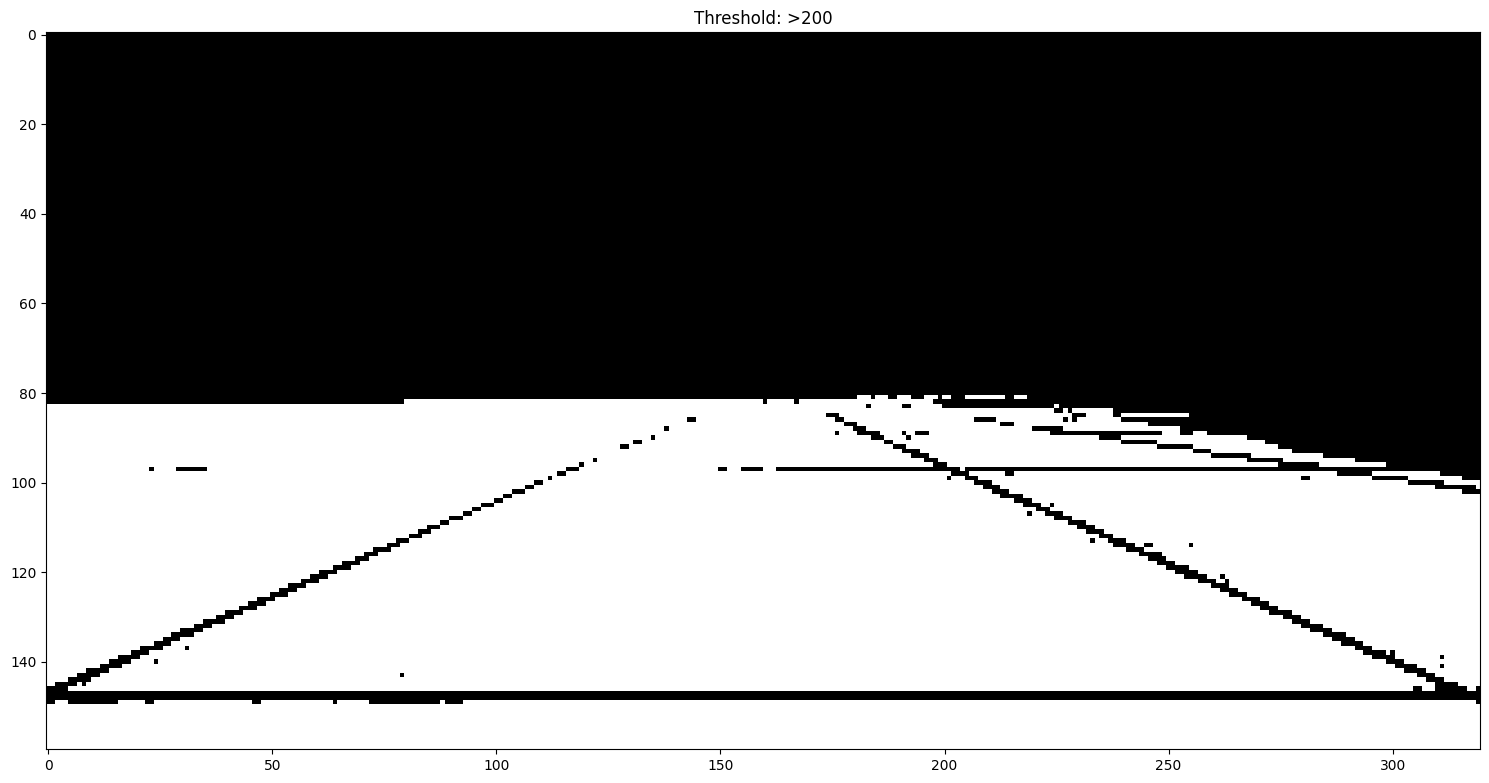

In [31]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format

import matplotlib.pyplot as plt
 
# Sample Image of scikit-image package

gray_coffee = gray(grid_img)
 
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 

threshold=200
# Iterating different thresholds
binarized_gray = (gray_coffee > threshold)*1


# Rounding of the threshold
# value to 1 decimal point
plt.title("Threshold: >"+str(round(threshold,1)))

# Displaying the binarized image
# of various thresholds
plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()

In [11]:
# def find_lines(img,minLineLength=150,maxLineGap=20,rho = 1,canny_t=(800,70),top=10):
#     img2 = img.copy()
    
#     edges = cv2.Canny(img2,canny_t[0],canny_t[1],apertureSize =3)
#     plt.imshow(edges)
#     lines = cv2.HoughLinesP(edges,
#                            rho = rho,
#                            theta = np.pi/180,threshold = 1,
#                            minLineLength = minLineLength,
#                            maxLineGap = maxLineGap)
#     try:
#         for line in lines:
#             mag = [np.sqrt(np.power(y2-y1,2)+np.power(x2-x1,2)) for x1,y1,x2,y2 in line]
#             mag = zip(np.arange(len(mag)),mag)
#             mag = sorted(mag, key=lambda tup: tup[1],reverse=True)
#             line = line[0]
#             print(line)
#             #print(lines[1])
#             for i in range(min(len(mag),top)):
#                 index = mag[i][0]
#                 x1,y1,x2,y2 = line
#                 cv2.line(img2,(x1,y1),(x2,y2),(0,255,0),2)
#     except:
#         raise
#     plt.imshow(img2)
# find_lines(binarized_gray)

In [ ]:
def polar2cartesian(rho: float, theta_rad: float, rotate90: bool = False):
    """
    Converts line equation from polar to cartesian coordinates

    Args:
        rho: input line rho
        theta_rad: input line theta
        rotate90: output line perpendicular to the input line

    Returns:
        m: slope of the line
           For horizontal line: m = 0
           For vertical line: m = np.nan
        b: intercept when x=0
    """
    x = np.cos(theta_rad) * rho
    y = np.sin(theta_rad) * rho
    m = np.nan
    if not np.isclose(x, 0.0):
        m = y / x
    if rotate90:
        if m is np.nan:
            m = 0.0
        elif np.isclose(m, 0.0):
            m = np.nan
        else:
            m = -1.0 / m
    b = 0.0
    if m is not np.nan:
        b = y - m * x

    return m, b


def line_end_points_on_image(rho: float, theta: float, image_shape: tuple):
    """
    Returns end points of the line on the end of the image
    Args:
        rho: input line rho
        theta: input line theta
        image_shape: shape of the image

    Returns:
        list: [(x1, y1), (x2, y2)]
    """
    m, b = polar2cartesian(rho, theta, True)

    end_pts = []

    if not np.isclose(m, 0.0):
        x = int(0)
        y = int(solve4y(x, m, b))
        if point_on_image(x, y, image_shape):
            end_pts.append((x, y))
            x = int(image_shape[1] - 1)
            y = int(solve4y(x, m, b))
            if point_on_image(x, y, image_shape):
                end_pts.append((x, y))

    if m is not np.nan:
        y = int(0)
        x = int(solve4x(y, m, b))
        if point_on_image(x, y, image_shape):
            end_pts.append((x, y))
            y = int(image_shape[0] - 1)
            x = int(solve4x(y, m, b))
            if point_on_image(x, y, image_shape):
                end_pts.append((x, y))

    return end_pts
def solve4x(y: float, m: float, b: float):
    """
    From y = m * x + b
         x = (y - b) / m
    """
    if np.isclose(m, 0.0):
        return 0.0
    if m is np.nan:
        return b
    return (y - b) / m


def solve4y(x: float, m: float, b: float):
    """
    y = m * x + b
    """
    if m is np.nan:
        return b
    return m * x + b


def point_on_image(x: int, y: int, image_shape: tuple):
    """
    Returns true is x and y are on the image
    """
    return 0 <= y < image_shape[0] and 0 <= x < image_shape[1]


def intersection(m1: float, b1: float, m2: float, b2: float):
    # Consider y to be equal and solve for x
    # Solve:
    #   m1 * x + b1 = m2 * x + b2
    x = (b2 - b1) / (m1 - m2)
    # Use the value of x to calculate y
    y = m1 * x + b1

    return int(round(x)), int(round(y))


def hough_lines_end_points(lines: np.array, image_shape: tuple):
    """
    Returns end points of the lines on the edge of the image
    """
    if len(lines.shape) == 3 and \
            lines.shape[1] == 1 and lines.shape[2] == 2:
        lines = np.squeeze(lines)
    end_pts = []
    for line in lines:
        rho, theta = line
        end_pts.append(
            line_end_points_on_image(rho, theta, image_shape))
    return end_pts
def hough_lines_intersection(lines: np.array, image_shape: tuple):
    """
    Returns the intersection points that lie on the image
    for all combinations of the lines
    """
    if len(lines.shape) == 3 and \
            lines.shape[1] == 1 and lines.shape[2] == 2:
        lines = np.squeeze(lines)
    lines_count = len(lines)
    intersect_pts = []
    for i in range(lines_count - 1):
        for j in range(i + 1, lines_count):
            m1, b1 = polar2cartesian(lines[i][0], lines[i][1], True)
            m2, b2 = polar2cartesian(lines[j][0], lines[j][1], True)
            x, y = intersection(m1, b1, m2, b2)
            if point_on_image(x, y, image_shape):
                intersect_pts.append([x, y])
    return np.array(intersect_pts, dtype=int)

## Perspective Transform

Define the perspective transform function from the lesson and test it on an image.

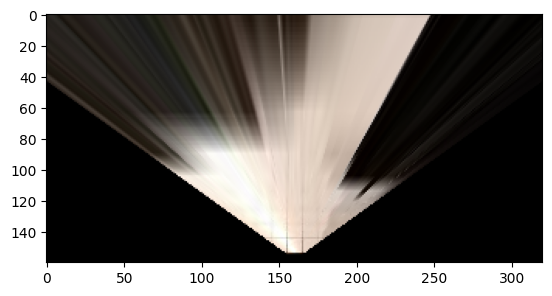

In [244]:
# Define a function to perform a perspective transform
# I've used the example grid image above to choose source points for the
# grid cell in front of the rover (each grid cell is 1 square meter in the sim)
# Define a function to perform a perspective transform
def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    
    return warped


# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
# The destination box will be 2*dst_size on each side
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
# this is just a rough guess, feel free to change it!
bottom_offset = 6
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])
warped = perspect_transform(grid_img, source, destination)
plt.imshow(warped)
#scipy.misc.imsave('../output/warped_example.jpg', warped)

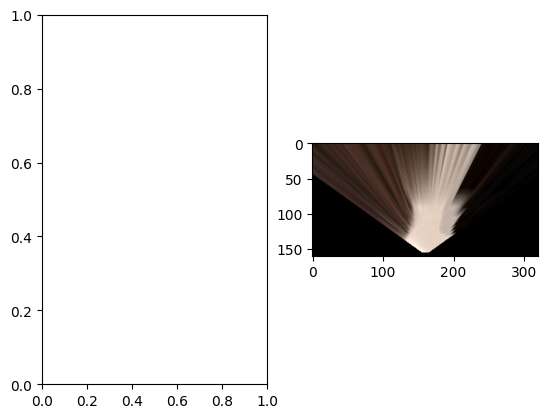

In [248]:
fig,ax=plt.subplots(1,2)
ax[0]=plt.imshow(grid_img)
ax[1]=plt.imshow(warped)

## Color Thresholding
Define the color thresholding function from the lesson and apply it to the warped image

**TODO:** Ultimately, you want your map to not just include navigable terrain but also obstacles and the positions of the rock samples you're searching for.  Modify this function or write a new function that returns the pixel locations of obstacles (areas below the threshold) and rock samples (yellow rocks in calibration images), such that you can map these areas into world coordinates as well.  
**Hints and Suggestion:** 
* For obstacles you can just invert your color selection that you used to detect ground pixels, i.e., if you've decided that everything above the threshold is navigable terrain, then everthing below the threshold must be an obstacle!


* For rocks, think about imposing a lower and upper boundary in your color selection to be more specific about choosing colors.  You can investigate the colors of the rocks (the RGB pixel values) in an interactive matplotlib window to get a feel for the appropriate threshold range (keep in mind you may want different ranges for each of R, G and B!).  Feel free to get creative and even bring in functions from other libraries.  Here's an example of [color selection](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html) using OpenCV.  

* **Beware However:** if you start manipulating images with OpenCV, keep in mind that it defaults to `BGR` instead of `RGB` color space when reading/writing images, so things can get confusing.

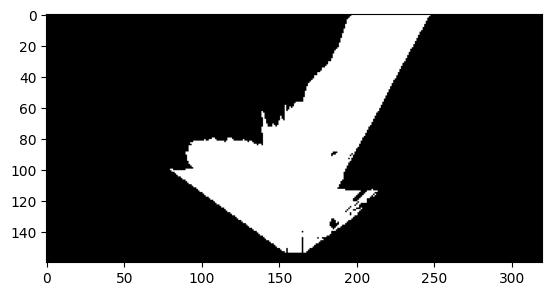

In [245]:
# Identify pixels above the threshold
# Threshold of RGB > 160 does a nice job of identifying ground pixels only
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

threshed = color_thresh(warped)
plt.imshow(threshed, cmap='gray')
#scipy.misc.imsave('../output/warped_threshed.jpg', threshed*255)

## Coordinate Transformations
Define the functions used to do coordinate transforms and apply them to an image.

/tmp/ipykernel_5779/2860462838.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
/tmp/ipykernel_5779/2860462838.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)


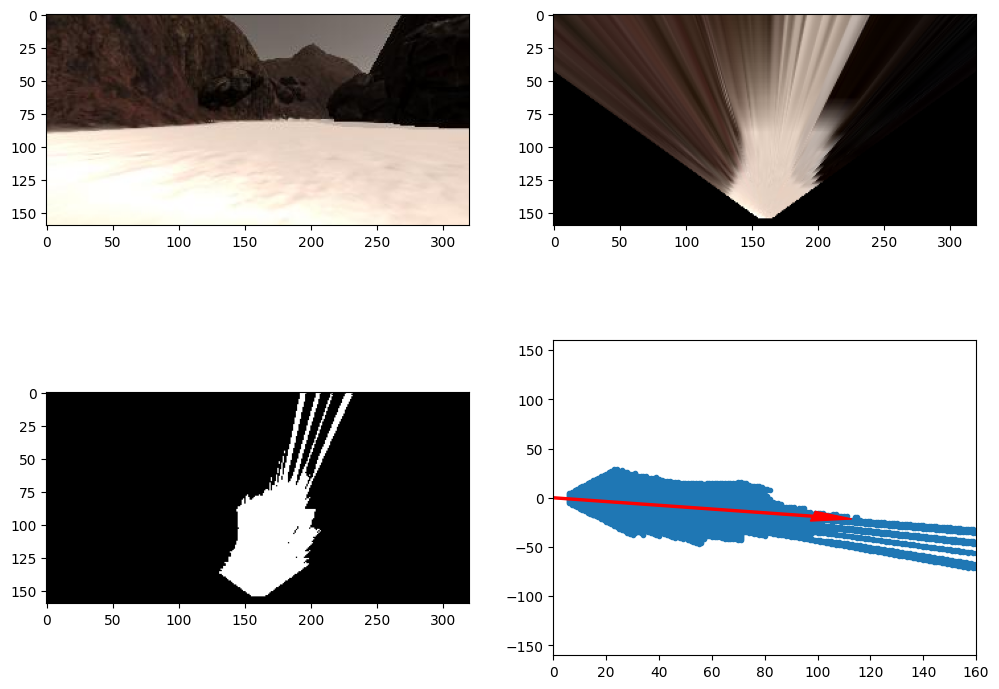

In [246]:
# Define a function to convert from image coords to rover coords
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel

# Define a function to convert to radial coords in rover space
def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle) 
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
    # Calculate angle away from vertical for each pixel
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles

# Define a function to map rover space pixels to world space
def rotate_pix(xpix, ypix, yaw):
    # Convert yaw to radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))
                            
    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad))
    # Return the result  
    return xpix_rotated, ypix_rotated

def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # Apply a scaling and a translation
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    # Return the result  
    return xpix_translated, ypix_translated


# Define a function to apply rotation and translation (and clipping)
# Once you define the two functions above this function should work
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Apply translation
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Perform rotation, translation and clipping all at once
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    # Return the result
    return x_pix_world, y_pix_world

# Grab another random image
idx = np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
warped = perspect_transform(image, source, destination)
threshed = color_thresh(warped)

# Calculate pixel values in rover-centric coords and distance/angle to all pixels
xpix, ypix = rover_coords(threshed)
dist, angles = to_polar_coords(xpix, ypix)
mean_dir = np.mean(angles)

# Do some plotting
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(threshed, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(mean_dir)
y_arrow = arrow_length * np.sin(mean_dir)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)



## Read in saved data and ground truth map of the world
The next cell is all setup to read your saved data into a `pandas` dataframe.  Here you'll also read in a "ground truth" map of the world, where white pixels (pixel value = 1) represent navigable terrain.  

After that, we'll define a class to store telemetry data and pathnames to images.  When you instantiate this class (`data = Databucket()`) you'll have a global variable called `data` that you can refer to for telemetry and map data within the `process_image()` function in the following cell.  


In [ ]:
# Import pandas and read in csv file as a dataframe
import pandas as pd
# Change the path below to your data directory
# If you are in a locale (e.g., Europe) that uses ',' as the decimal separator
# change the '.' to ','
df = pd.read_csv('../test_dataset/robot_log.csv', delimiter=';', decimal='.')
csv_img_list = df["Path"].tolist() # Create list of image pathnames
# Read in ground truth map and create a 3-channel image with it
ground_truth = mpimg.imread('../calibration_images/map_bw.png')
ground_truth_3d = np.dstack((ground_truth*0, ground_truth*255, ground_truth*0)).astype(np.float)

# Creating a class to be the data container
# Will read in saved data from csv file and populate this object
# Worldmap is instantiated as 200 x 200 grids corresponding 
# to a 200m x 200m space (same size as the ground truth map: 200 x 200 pixels)
# This encompasses the full range of output position values in x and y from the sim
class Databucket():
    def __init__(self):
        self.images = csv_img_list  
        self.xpos = df["X_Position"].values
        self.ypos = df["Y_Position"].values
        self.yaw = df["Yaw"].values
        self.count = 0 # This will be a running index
        self.worldmap = np.zeros((200, 200, 3)).astype(np.float)
        self.ground_truth = ground_truth_3d # Ground truth worldmap

# Instantiate a Databucket().. this will be a global variable/object
# that you can refer to in the process_image() function below
data = Databucket()


## Write a function to process stored images

Modify the `process_image()` function below by adding in the perception step processes (functions defined above) to perform image analysis and mapping.  The following cell is all set up to use this `process_image()` function in conjunction with the `moviepy` video processing package to create a video from the images you saved taking data in the simulator.  

In short, you will be passing individual images into `process_image()` and building up an image called `output_image` that will be stored as one frame of video.  You can make a mosaic of the various steps of your analysis process and add text as you like (example provided below).  



To start with, you can simply run the next three cells to see what happens, but then go ahead and modify them such that the output video demonstrates your mapping process.  Feel free to get creative!

In [36]:

# Define a function to pass stored images to
# reading rover position and yaw angle from csv file
# This function will be used by moviepy to create an output video
def process_image(img):
    # Example of how to use the Databucket() object defined above
    # to print the current x, y and yaw values 
    # print(data.xpos[data.count], data.ypos[data.count], data.yaw[data.count])

        # TODO: 
        # 1) Define source and destination points for perspective transform
        # 2) Apply perspective transform
    # 3) Apply color threshold to identify navigable terrain/obstacles/rock samples
    # 4) Convert thresholded image pixel values to rover-centric coords
    # 5) Convert rover-centric pixel values to world coords
    # 6) Update worldmap (to be displayed on right side of screen)
        # Example: data.worldmap[obstacle_y_world, obstacle_x_world, 0] += 1
        #          data.worldmap[rock_y_world, rock_x_world, 1] += 1
        #          data.worldmap[navigable_y_world, navigable_x_world, 2] += 1

    # 7) Make a mosaic image, below is some example code
        # First create a blank image (can be whatever shape you like)
    output_image = np.zeros((img.shape[0] + data.worldmap.shape[0], img.shape[1]*2, 3))
        # Next you can populate regions of the image with various output
        # Here I'm putting the original image in the upper left hand corner
    output_image[0:img.shape[0], 0:img.shape[1]] = img

        # Let's create more images to add to the mosaic, first a warped image
    warped = perspect_transform(img, source, destination)
        # Add the warped image in the upper right hand corner
    output_image[0:img.shape[0], img.shape[1]:] = warped

        # Overlay worldmap with ground truth map
    map_add = cv2.addWeighted(data.worldmap, 1, data.ground_truth, 0.5, 0)
        # Flip map overlay so y-axis points upward and add to output_image 
    output_image[img.shape[0]:, 0:data.worldmap.shape[1]] = np.flipud(map_add)


        # Then putting some text over the image
    cv2.putText(output_image,"Populate this image with your analyses to make a video!", (20, 20), 
                cv2.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)
    if data.count < len(data.images) - 1:
        data.count += 1 # Keep track of the index in the Databucket()
    
    return output_image

## Make a video from processed image data
Use the [moviepy](https://zulko.github.io/moviepy/) library to process images and create a video.
  

In [37]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from moviepy.editor import ImageSequenceClip


# Define pathname to save the output video
output = '../output/test_mapping.mp4'
data = Databucket() # Re-initialize data in case you're running this cell multiple times
clip = ImageSequenceClip(data.images, fps=60) # Note: output video will be sped up because 
                                          # recording rate in simulator is fps=25
new_clip = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time new_clip.write_videofile(output, audio=False)

Moviepy - Building video ../output/test_mapping.mp4.
Moviepy - Writing video ../output/test_mapping.mp4



TypeError: must be real number, not NoneType

### This next cell should function as an inline video player
If this fails to render the video, try running the following cell (alternative video rendering method).  You can also simply have a look at the saved mp4 in your `/output` folder

In [38]:

from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

### Below is an alternative way to create a video in case the above cell did not work.

In [ ]:
import io
import base64
video = io.open(output, 'r+b').read()
encoded_video = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded_video.decode('ascii')))